Benchmark the new `DoiRegressionModel` class

In [1]:
import os
from sys import path

cwd = os.getcwd()
path.append(f"{cwd}/..")

from doi_benchmark import Benchmark


def benchmark_max_depth(tested_max_depths: range = range(1, 10)):
  '''Measures how varying `max_depth` parameter influences progressive DOI prediction scores, over 
  a series of chunks (without retraining) --- how stable/overfitted is the tree model.'''
  benchmark = Benchmark(max_depths=tested_max_depths)
  scores = benchmark.run()
  return scores


def benchmark_retraining_intervals(tested_intervals: range = range(25)):
  '''Measures how varying the update interval influences progressive DOI prediction scores.'''
  benchmark = Benchmark(intervals=tested_intervals)
  scores = benchmark.run()
  return scores


def benchmark_chunk_size(tested_sizes: range = range(1000, 110000, 10000)):
  '''Measures how varying the chunk size influences the progressive DOI prediction scores (without
   retraining, without context)'''
  benchmark = Benchmark(chunk_size=tested_sizes)
  scores = benchmark.run()
  return scores


def benchmark_context_size(tested_sizes: range = range(0, 11000, 1000)):
  '''Measures how varying the context size influences the progressive DOI prediction scores (without
   retraining)'''
  benchmark = Benchmark(context_size=tested_sizes)
  scores = benchmark.run()
  return scores


def benchmark_context_strategies(context_strats=["stratified", "minmax"]):
  benchmark = Benchmark(n_chunks=50, context_size=500, intervals=50, measure_doi_error=True, context_strats=context_strats)
  scores = benchmark.run()

  return scores


def benchmark_doi_error_without_context():
  '''Measures the changes in DOI error throughout the progression, when no optimizations are 
   applied.'''
  benchmark = Benchmark(n_chunks=100, chunk_size=1000, measure_doi_error=True)
  scores = benchmark.run()

  return scores

  
def benchmark_doi_error_with_context():
  '''Measures the changes in DOI error throughout the progression, when context optimizations are 
   applied.'''
  benchmark = Benchmark(n_chunks=100, chunk_size=1000, measure_doi_error=True, context_size=1000, intervals=5, context_strats="stratified")
  scores = benchmark.run()

  return scores

def benchmark_retraining_strategies():
  '''Measures the changes in DOI error throughout the progression, when context is applied by simply predicting the DOI'''

  benchmark = Benchmark(n_chunks=100, chunk_size=1000, context_size=1000, intervals=5, measure_doi_error=True, measure_timings=True, include_previous_chunks_in_training=[True, False])
  scores = benchmark.run()

  return scores


# TODO: show reduction in overall error when updating "outdated" values with each new model

# results: max_depth = 3 has best peformance, then no improvement/worse for bigger values
# max_depth_results = benchmark_max_depth()

# results: trivial best results for 0 and 1, score std for 3-8 above 0.9 
# intervals_results = benchmark_retraining_intervals()

# results: the larger the context the worse the scores.
# context_size_results = benchmark_context_size()

# results: the larger the chunk size, the better the scores
# chunk_size_results = benchmark_chunk_size()

# results: minmax worse than stratified sampling
# context_strategies_results = benchmark_context_strategies()

# results: overall error increases with every chunk -> DOI values "age"
# doi_error_without_context_results = benchmark_doi_error_without_context()

# results: error increases over time but not as badly as without the context and it gets better
# doi_error_with_context_results = benchmark_doi_error_with_context()

# results: including the prior model in the update 
doi_error_with_prediction_context = benchmark_retraining_strategies()

<AxesSubplot:xlabel='chunk'>

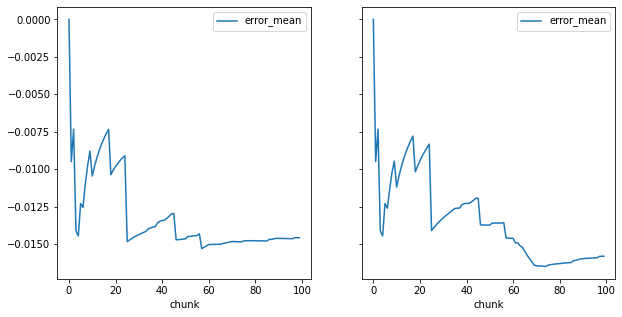

In [2]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

doi_error_with_prediction_context[~doi_error_with_prediction_context["include_previous_chunks_in_training"]].plot(x="chunk", y="error_mean", ax=axes[0])
doi_error_with_prediction_context[doi_error_with_prediction_context["include_previous_chunks_in_training"]].plot(x="chunk", y="error_mean", ax=axes[1])

<AxesSubplot:xlabel='chunk'>

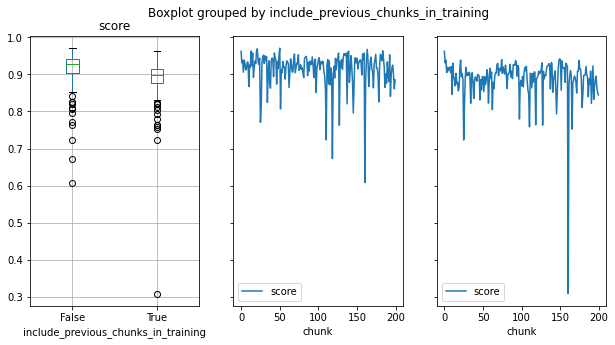

In [25]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(10, 5), sharey=True)

doi_error_with_prediction_context.boxplot(column="score", by="include_previous_chunks_in_training", ax=axes[0])

doi_error_with_prediction_context[~doi_error_with_prediction_context["include_previous_chunks_in_training"]].plot(y="score", x="chunk", ax=axes[1])

doi_error_with_prediction_context[doi_error_with_prediction_context["include_previous_chunks_in_training"]].plot(y="score", x="chunk", ax=axes[2])

<AxesSubplot:>

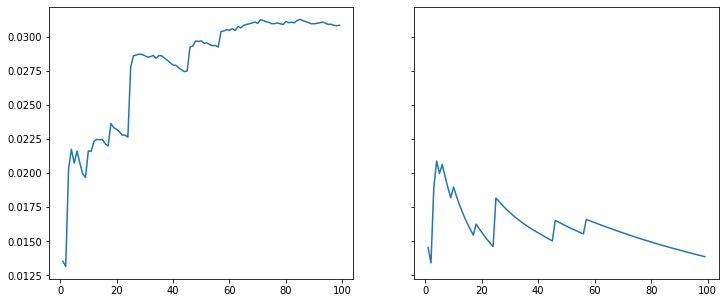

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)

doi_error_without_context_results["error_std"].plot(ax=axes[0])
doi_error_with_context_results["error_std"].plot(ax=axes[1])

<AxesSubplot:xlabel='chunk'>

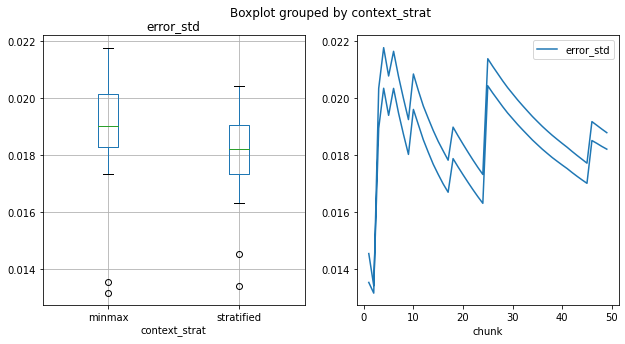

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

context_strategies_results.boxplot(column="error_std", by="context_strat", ax=axes[0])
context_strategies_results.plot(y="error_std", x="chunk",  ax=axes[1])


<AxesSubplot:title={'center':'score'}, xlabel='max_depth'>

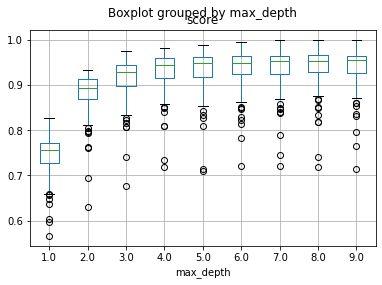

In [10]:
max_depth_results.boxplot(column="score", by="max_depth")

<AxesSubplot:title={'center':'score'}, xlabel='interval'>

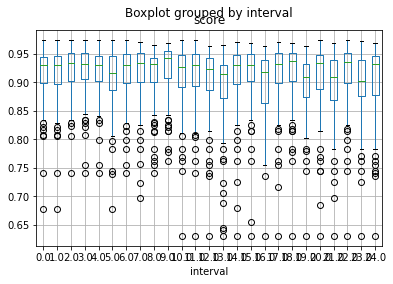

In [11]:
intervals_results.boxplot(column="score", by="interval")

<AxesSubplot:title={'center':'score'}, xlabel='context_size'>

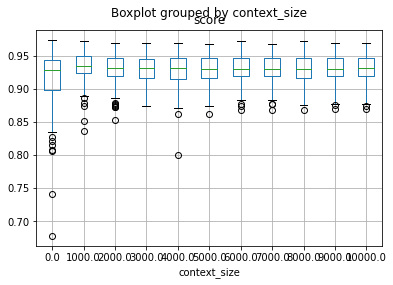

In [12]:
context_size_results.boxplot(column="score", by="context_size")

<AxesSubplot:title={'center':'score'}, xlabel='chunk_size'>

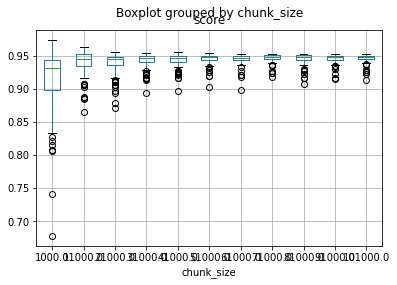

In [13]:
chunk_size_results.boxplot(column="score", by="chunk_size")